In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
Batch_Size=32
Image_size=256
channels=3
Epochs=5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Tomato',
    batch_size=Batch_Size,
    image_size=(Image_size,Image_size),
    shuffle=True)

Found 14335 files belonging to 9 classes.


In [5]:
len(dataset)

448

In [6]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

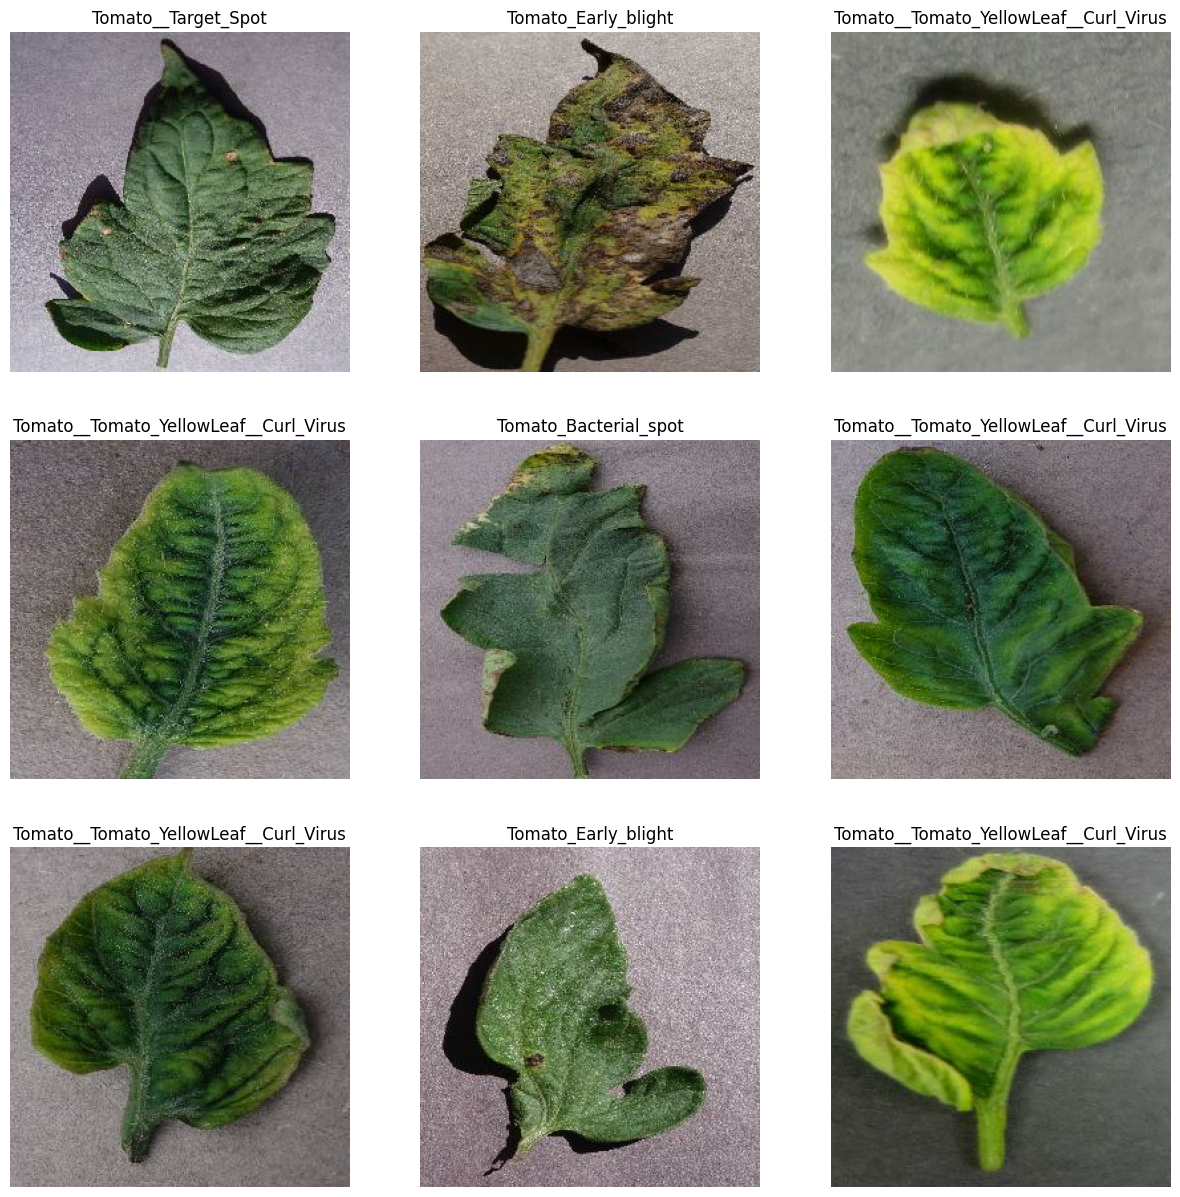

In [8]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(9):

        plt.subplot(3,3,i+1)
        a = image_batch[i].numpy().astype('uint8')
        b = label_batch[i]
        plt.title(class_names[b])
        plt.imshow(a)
        plt.axis('off')

In [9]:
def dataset_partitioning(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=123)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [10]:
#Split the dataset 
train_ds,val_ds,test_ds=dataset_partitioning(dataset)

In [11]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(Image_size,Image_size),
    layers.Rescaling(1.0/255)
    
])

In [13]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizonta and vertical'),
    layers.RandomRotation(0.2)    
])

In [14]:
n_classes=9
input_shape=(Batch_Size,Image_size,Image_size,channels)

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
        
])

model.build(input_shape=input_shape)

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 9)                │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,137 (719.29 KB)

 Trainable params: 184,137 (719.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [22]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 913s 2s/step - accuracy: 0.3339 - loss: 1.7974 - val_accuracy: 0.5625 - val_loss: 1.3664
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.6750 - loss: 0.9101 - val_accuracy: 0.7287 - val_loss: 0.7963
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.7933 - loss: 0.5705 - val_accuracy: 0.7912 - val_loss: 0.6516
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 334s 933ms/step - accuracy: 0.8401 - loss: 0.4462 - val_accuracy: 0.8104 - val_loss: 0.6663
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 339s 947ms/step - accuracy: 0.8715 - loss: 0.3801 - val_accuracy: 0.7947 - val_loss: 0.8634


In [24]:

import os
model_version=max([int (i) for i in os.listdir('../Models')+[0]])+1
model.export(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets


INFO:tensorflow:Assets written to: ../Models/1\assets


Saved artifact at '../Models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  2383475725840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475726224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475729488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475730256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475728528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475728912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475731408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475730640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475730448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475732368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383475732176: TensorSpec(shape=(), dty